# Project 7 - Logistic Regression and Support Vector Machines

## Notebook imports and settings

In [1]:
# Python imports

# Numerical imports
import numpy as np
import pandas as pd

# SkLearn imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit


# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting settings
sns.set()
sns.set_palette("colorblind")
sns.set_style("ticks")


## Load and format data

In [2]:
bank_notes = pd.read_csv(
    "./data/data_banknote_authentication.txt",
    sep=",",
    header = None,
    names = ['variance', 'skewness', 'curtosis', 'entropy', 'class' ]
)

display(bank_notes.head())

# Shuffling the data set
bank_notes = bank_notes.sample(frac = 1)

# Split into test / train when not using SSS
split = int(0.8 * len(bank_notes))
bank_notes_train = bank_notes[:split]
bank_notes_test = bank_notes[split:]

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

## Logistic Regression

In [3]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

y = bank_notes_train[["class"]]
X = bank_notes_train.drop("class", axis=1)

precision, recall, f1 = 0., 0, 0.

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.flatten()
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.flatten()
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred)
    precision += f
    recall += r
    f1 += f
    
precision /= 5
recall /= 5
f1 /= 5

print(f"Precision of good bills:  {precision[0]:.4f}")
print(f"Precision of bad bills: {precision[1]:.4f}")
print()

print(f"Recall of good bills:     {recall[0]:.4f}")
print(f"Recall of bad bills:    {recall[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1[0]:.4f}")
print(f"F1 Score of bad bills:  {f1[1]:.4f}")
print()

Precision of good bills:  0.9901
Precision of bad bills: 0.9879

Recall of good bills:     0.9803
Recall of bad bills:    1.0000

F1 Score of good bills:   0.9901
F1 Score of bad bills:  0.9879



## Support Vector Machine (SVM)

In [4]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

y = bank_notes_train[["class"]]
X = bank_notes_train.drop("class", axis=1)

precision_linear, recall_linear, f1_linear = 0., 0, 0.
precision_rbf, recall_rbf, f1_rbf = 0., 0, 0.
precision_poly, recall_poly, f1_poly = 0., 0, 0.

fignum = 1
for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.flatten()
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.flatten()
    
    clf_linear = SVC(kernel = 'linear', random_state=0, gamma = 'auto',class_weight="balanced").fit(X_train, y_train)
    clf_rbf = SVC(kernel = 'rbf', random_state=0, gamma = .01,class_weight="balanced").fit(X_train, y_train)
    clf_poly = SVC(kernel = 'poly', random_state=0, degree = 4,class_weight="balanced").fit(X_train, y_train)

    y_pred_linear = clf_linear.predict(X_test)
    y_pred_rbf = clf_rbf.predict(X_test)
    y_pred_poly = clf_poly.predict(X_test)
    
    
    p_linear, r_linear, f_linear, _ = precision_recall_fscore_support(y_test, y_pred_linear)
    precision_linear += f_linear
    recall_linear += r_linear
    f1_linear += f_linear

    p_rbf, r_rbf, f_rbf, _ = precision_recall_fscore_support(y_test, y_pred_rbf)
    precision_rbf += f_rbf
    recall_rbf += r_rbf
    f1_rbf += f_rbf

    p_poly, r_poly, f_poly, _ = precision_recall_fscore_support(y_test, y_pred_poly)
    precision_poly += f_poly
    recall_poly += r_poly
    f1_poly += f_poly
    
precision_linear /= 5
recall_linear /= 5
f1_linear /= 5

precision_rbf /= 5
recall_rbf /= 5
f1_rbf /= 5

precision_poly /= 5
recall_poly /= 5
f1_poly /= 5

print('LINEAR!!!')
print(f"Precision of good bills:  {precision_linear[0]:.4f}")
print(f"Precision of bad bills: {precision_linear[1]:.4f}")
print()

print(f"Recall of good bills:     {recall_linear[0]:.4f}")
print(f"Recall of bad bills:    {recall_linear[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1_linear[0]:.4f}")
print(f"F1 Score of bad bills:  {f1_linear[1]:.4f}")
print()

print('RBF!')
print(f"Precision of good bills:  {precision_rbf[0]:.4f}")
print(f"Precision of bad bills: {precision_rbf[1]:.4f}")
print()

print(f"Recall of good bills:     {recall_rbf[0]:.4f}")
print(f"Recall of bad bills:    {recall_rbf[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1_rbf[0]:.4f}")
print(f"F1 Score of bad bills:  {f1_rbf[1]:.4f}")
print()

print('POLY!')
print(f"Precision of good bills:  {precision_poly[0]:.4f}")
print(f"Precision of bad bills: {precision_poly[1]:.4f}")
print()

print(f"Recall of good bills:     {recall_poly[0]:.4f}")
print(f"Recall of bad bills:    {recall_poly[1]:.4f}")
print()

print(f"F1 Score of good bills:   {f1_poly[0]:.4f}")
print(f"F1 Score of bad bills:  {f1_poly[1]:.4f}")
print()

LINEAR!!!
Precision of good bills:  0.9901
Precision of bad bills: 0.9879

Recall of good bills:     0.9803
Recall of bad bills:    1.0000

F1 Score of good bills:   0.9901
F1 Score of bad bills:  0.9879

RBF!
Precision of good bills:  0.9950
Precision of bad bills: 0.9940

Recall of good bills:     0.9902
Recall of bad bills:    1.0000

F1 Score of good bills:   0.9950
F1 Score of bad bills:  0.9940

POLY!
Precision of good bills:  0.8413
Precision of bad bills: 0.8544

Recall of good bills:     0.7262
Recall of bad bills:    1.0000

F1 Score of good bills:   0.8413
F1 Score of bad bills:  0.8544



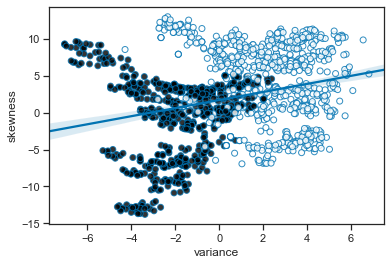

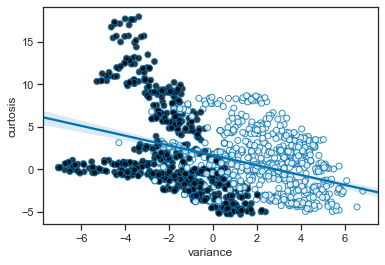

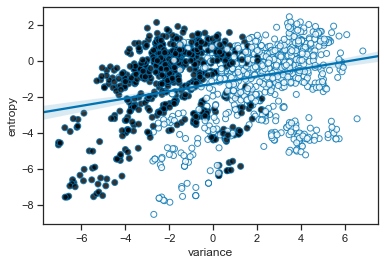

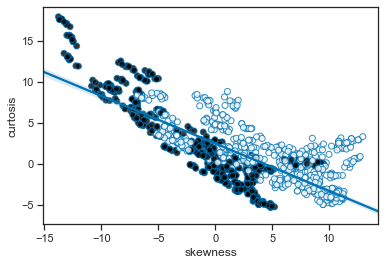

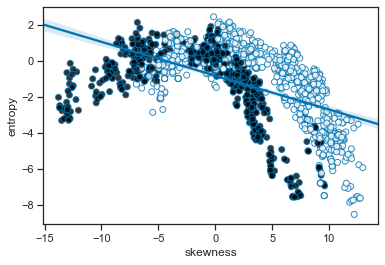

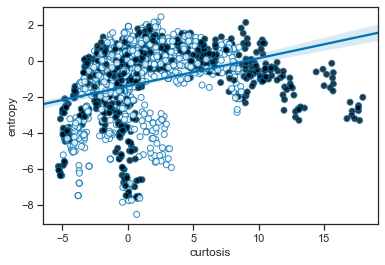

In [5]:
bank_notes["color"]= np.where(bank_notes["class"] == 1.0, "#000000", "#ffffff")
columns = ['variance', 'skewness', 'curtosis', 'entropy']
for i in range(len(columns)):
    for j in range(len(columns)):
        if i >= j:
            continue
        else:
            plt.figure()
            sns.regplot(x = columns[i], y= columns[j], data = bank_notes, scatter_kws={'facecolors': bank_notes["color"]})
            plt.show()

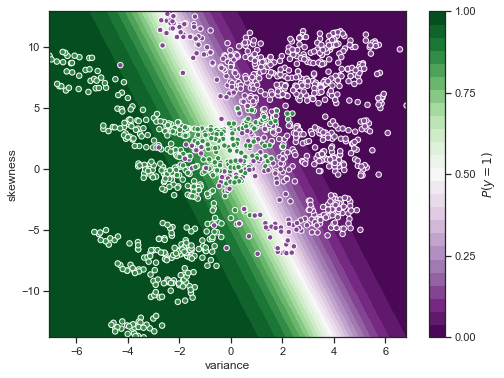

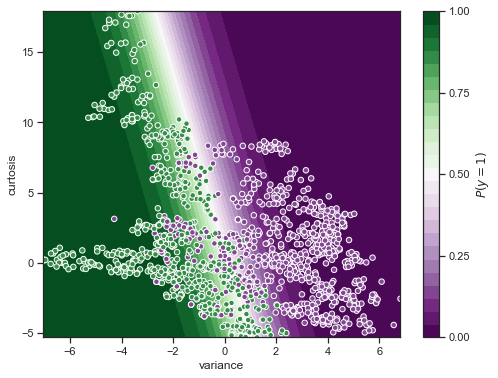

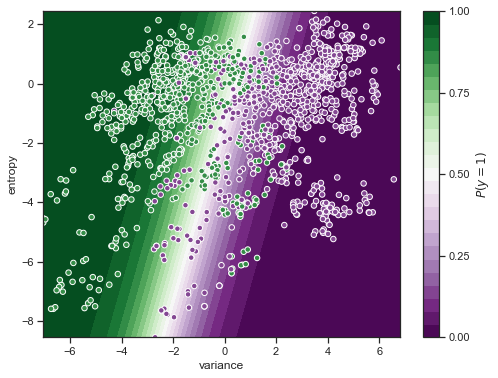

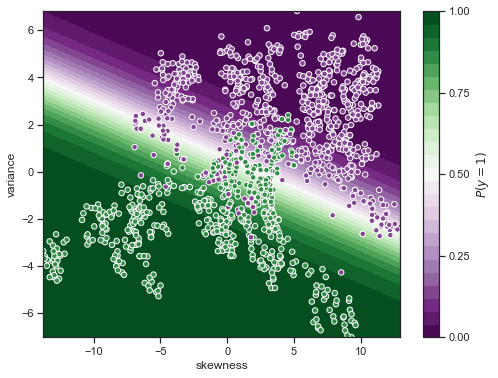

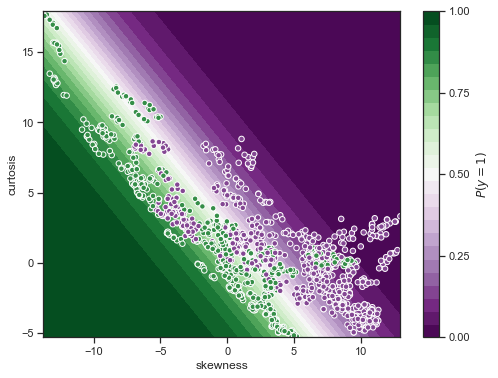

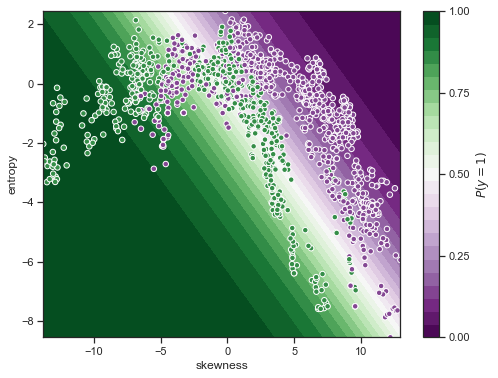

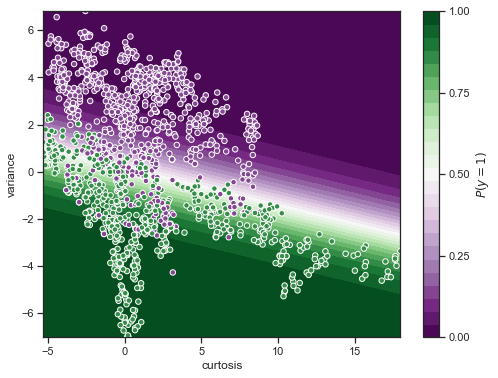

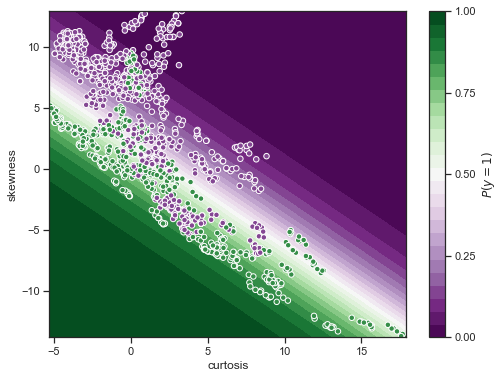

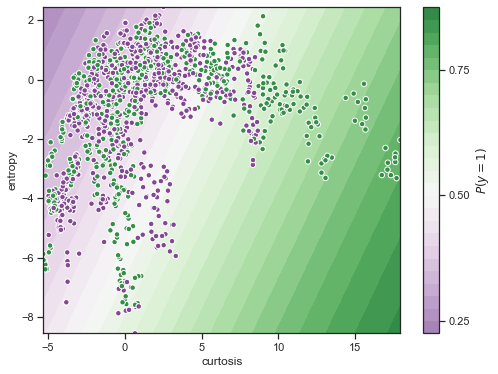

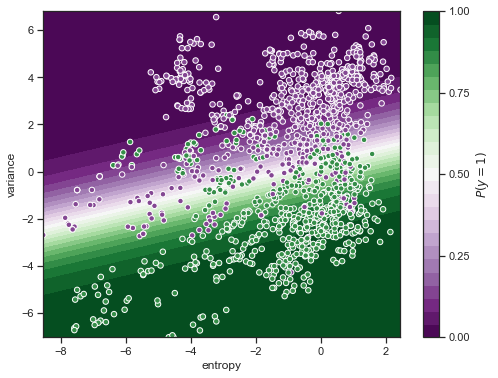

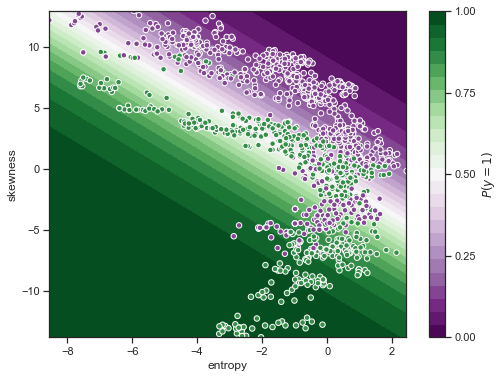

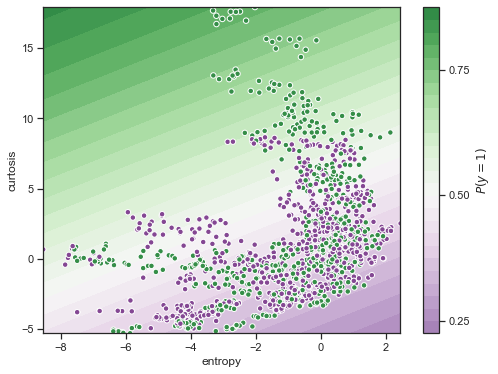

In [6]:
columns = ['variance', 'skewness', 'curtosis', 'entropy']
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            continue
        df = bank_notes.copy()
        target = "class"

        X, y = df[[col1, col2]], df[[target]].values.flatten()
        clf = LogisticRegression().fit(X, y)

        xx, yy = df[[col1]].values.flatten(), df[[col2]].values.flatten()
        xx, yy = np.mgrid[xx.min() : xx.max() : 0.01, yy.min() : yy.max() : 0.01]
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

        f, ax = plt.subplots(figsize=(8, 6))
        contour = ax.contourf(xx, yy, probs, 25, cmap="PRGn", vmin=0, vmax=1)
        ax_c = f.colorbar(contour)
        ax_c.set_label("$P(y = 1)$")
        ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

        ax.scatter(X[col1].values.flatten(), X[col2].values.flatten(), c=y, s=30, cmap="PRGn", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
        ax.set(xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xlabel=col1, ylabel=col2)

        plt.show()

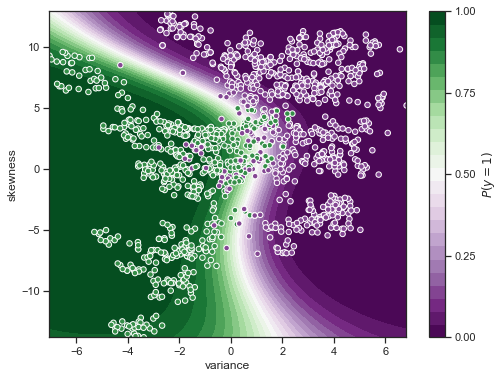

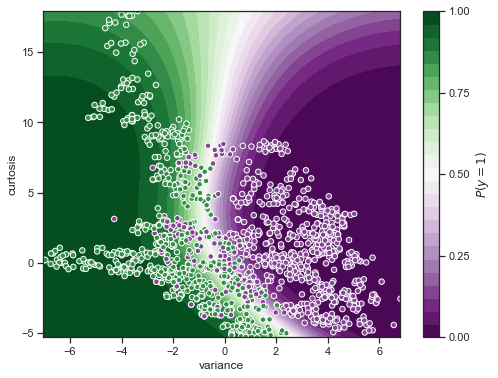

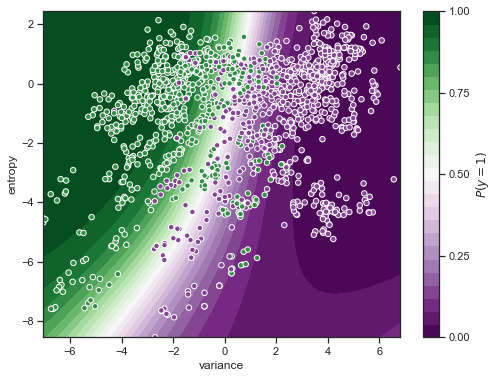

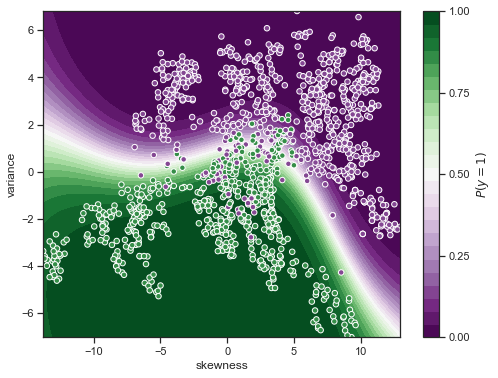

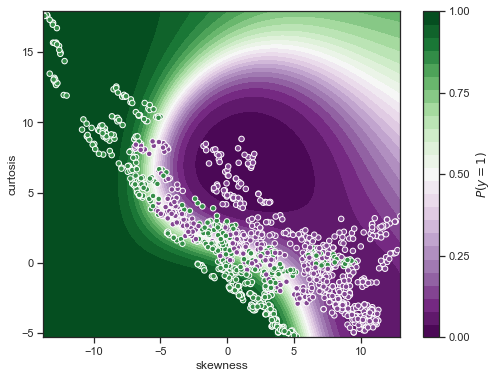

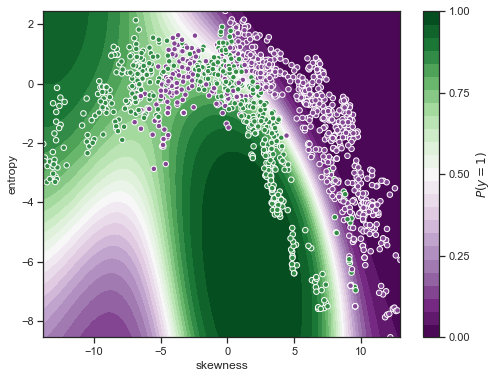

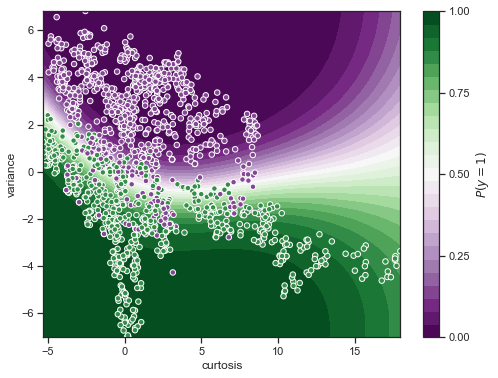

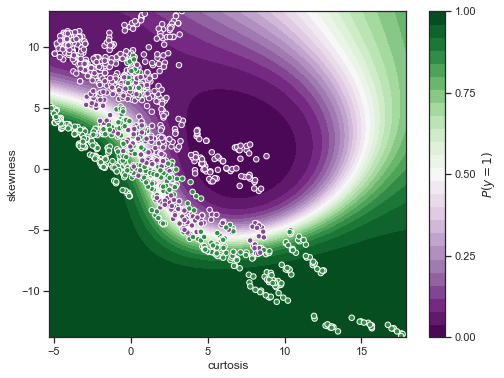

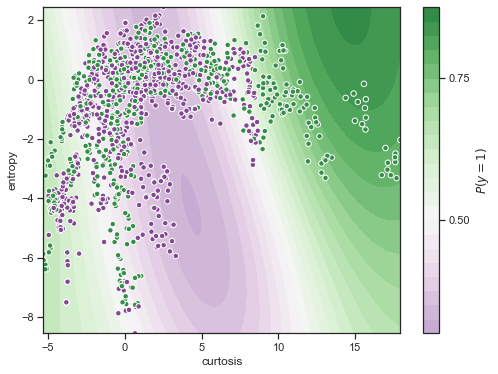

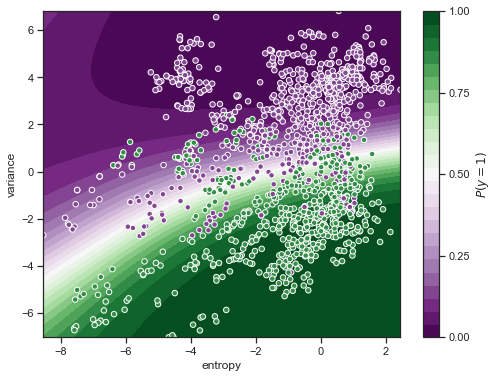

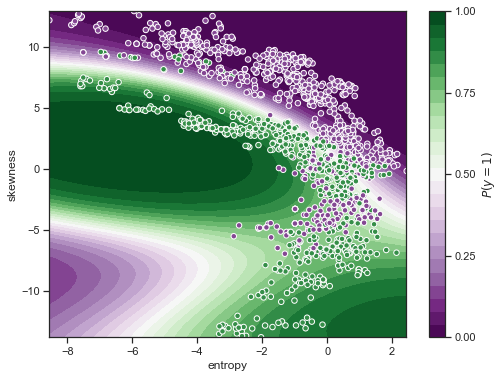

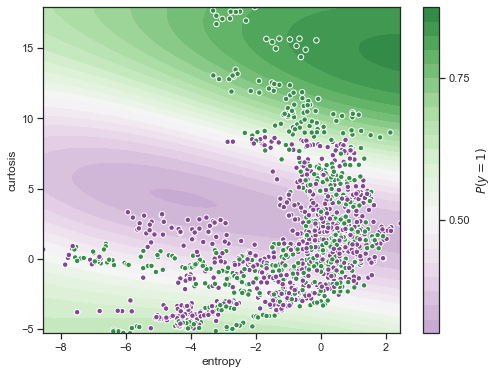

In [7]:
columns = ['variance', 'skewness', 'curtosis', 'entropy']
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            continue
        df = bank_notes.copy()
        target = "class"

        X, y = df[[col1, col2]], df[[target]].values.flatten()
        clf = SVC(kernel = 'rbf', random_state=0, gamma = 0.01, class_weight="balanced", probability = True).fit(X, y)

        xx, yy = df[[col1]].values.flatten(), df[[col2]].values.flatten()
        xx, yy = np.mgrid[xx.min() : xx.max() : 0.01, yy.min() : yy.max() : 0.01]
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

        f, ax = plt.subplots(figsize=(8, 6))
        contour = ax.contourf(xx, yy, probs, 25, cmap="PRGn", vmin=0, vmax=1)
        ax_c = f.colorbar(contour)
        ax_c.set_label("$P(y = 1)$")
        ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

        ax.scatter(X[col1].values.flatten(), X[col2].values.flatten(), c=y, s=30, cmap="PRGn", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
        ax.set(xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xlabel=col1, ylabel=col2)

        plt.show()

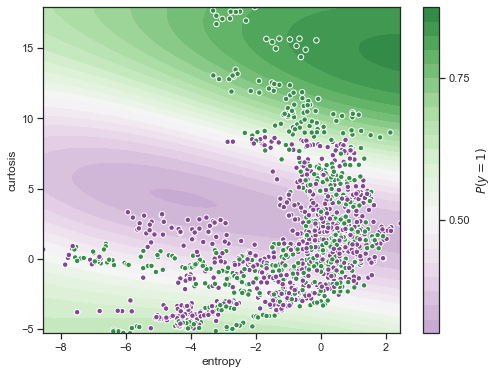

-5.2861 17.9239


In [8]:
df = bank_notes.copy()
col1 = "entropy"
col2 = "curtosis"
target = "class"

X, y = df[[col1, col2]], df[[target]].values.flatten()
# Run this with a high gamma and a low gamma to see the difference between variance and bias?
clf = SVC(kernel = 'rbf', random_state=0, gamma = 0.01, class_weight="balanced", probability = True).fit(X, y)

xx, yy = df[[col1]].values.flatten(), df[[col2]].values.flatten()
xx, yy = np.mgrid[xx.min() : xx.max() : 0.01, yy.min() : yy.max() : 0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="PRGn", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(X[col1].values.flatten(), X[col2].values.flatten(), c=y, s=30, cmap="PRGn", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xlabel= col1, ylabel=col2)

# Low gamma makes it so that you do'nt overfit
# High gamma makes it so that your data can, most likely, overfit
# Basically gamma = variance
#plt.savefig('low_gamma.png')
#plt.savefig('high_gamma.png')
plt.savefig('./images/bad_egg.png')
plt.show()